# Problem Statement


Markdown
Regression: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

in regression the dataset has around 20 Lakh entries , we are going take a random sample of 40k entries from that 

Classification:https://archive.ics.uci.edu/ml/datasets/Census+Income

Data ingestion EDA Preprocessing Pickling for the preprocessing object(save the preprocessing model) After preprocessing you have to store data inside MONGODB

You have to load the data from mongo db Model

Regression:linear regression,ridge regression,lasso regression,elastic net, support vector regression

Classification: logistic regression,SVM(kernel)

Hyperparameter tuning is mandatory(GRID SEARCH CV)

Evaluation of the model Regression evaluation matrix: R2 and adjusted R2 Classification confusion matrix, ROC AUC score

Submission form link: https://forms.gle/2PJSSCmL9S865nwe8

Deadline till saturday 12AM IST

USE IDE: jupyter notebook

In [1]:
#packages importing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### loading data set

In [2]:
# loading data from the data folder
data =pd.read_csv("Data/household_power_consumption.txt",sep=';')

Source:

Georges Hebrail (georges.hebrail '@' edf.fr), Senior Researcher, EDF R&D, Clamart, France
Alice Berard, TELECOM ParisTech Master of Engineering Internship at EDF R&D, Clamart, France


Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

Notes:

1.(global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.

2.The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: 

a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.


Attribute Information:

* date: Date in format dd/mm/yyyy
* time: time in format hh:mm:ss
* global_active_power: household global minute-averaged active power (in kilowatt)
* global_reactive_power: household global minute-averaged reactive power (in kilowatt)
* voltage: minute-averaged voltage (in volt)
* global_intensity: household global minute-averaged current intensity (in ampere)
* sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
* sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
* sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [3]:
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
data.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [5]:
data.shape

(2075259, 9)

In [6]:
# randon selection of 40k data from 2 lakh entries

data1=data.sample(n=40000, frac=None, replace=False, weights=None, random_state=None, axis=None)



In [7]:
data1.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [8]:
data1.shape

(40000, 9)

In [9]:
data1['Date'].index

Int64Index([2015190, 1133345, 1598244, 1260386, 1861818,  100337,  293923,
             848432, 1096073,  283010,
            ...
            1327639, 1270591, 1027668, 1167774,  675113,  931941,  506873,
             820776,  798393,  126346],
           dtype='int64', length=40000)

In [10]:
data1.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

In [11]:
data1.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
931941,23/9/2008,21:45:00,0.868,0.046,239.070,3.600,0.000,0.000,0.0
506873,3/12/2007,17:17:00,0.222,0.000,239.700,1.000,0.000,0.000,0.0
820776,8/7/2008,17:00:00,0.832,0.112,240.160,3.600,0.000,0.000,11.0
798393,23/6/2008,03:57:00,0.214,0.104,240.510,1.000,0.000,1.000,1.0
126346,14/3/2007,11:10:00,0.312,0.114,241.870,1.400,0.000,1.000,0.0


In [12]:
data1.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2015190,16/10/2010,03:54:00,0.402,0.206,244.210,1.800,0.000,1.000,0.0
1133345,10/2/2009,18:29:00,1.012,0.078,241.060,4.200,0.000,0.000,0.0
1598244,30/12/2009,14:48:00,1.524,0.240,244.740,6.200,0.000,0.000,19.0
1260386,9/5/2009,23:50:00,0.400,0.124,243.400,1.800,0.000,0.000,0.0
1861818,1/7/2010,15:42:00,1.142,0.348,238.290,5.000,0.000,0.000,1.0


In [13]:
data1.dtypes

Date                      object
Time                      object
Global_active_power       object
Global_reactive_power     object
Voltage                   object
Global_intensity          object
Sub_metering_1            object
Sub_metering_2            object
Sub_metering_3           float64
dtype: object

**All the data columnsas of type Object we need to convert the following columns to float type**

* Global_active_power
* Global_reactive_power
* Voltage
* Global_intensity
* Sub_metering_1
* Sub_metering_2 

**It was observed there are "?" in the entries , we are not going to use that entries we are going to drop those entries with ? values**

In [14]:
data1.drop(data1[data1['Global_active_power']=='?'].index, inplace= True)

In [15]:
# we could see some rows are dropped 
data1.shape

(39496, 9)

In [16]:
# converting the datatype to float 

data1[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']]=data1[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Sub_metering_1','Sub_metering_2']].astype(str).astype(float)

In [17]:
data1.dtypes
# required columns are converted to float

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [18]:
data1.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,39496.000000,39496.000000,39496.000000,39496.000000,39496.000000,39496.000000,39496.000000
mean,1.094252,0.123737,240.832076,4.639614,1.149559,1.311956,6.517344
std,1.063042,0.112751,3.233601,4.469918,6.221594,5.805719,8.446695
min,0.078000,0.000000,225.900000,0.200000,0.000000,0.000000,0.000000
25%,0.308000,0.048000,238.980000,1.400000,0.000000,0.000000,0.000000
50%,0.598000,0.100000,241.000000,2.600000,0.000000,0.000000,1.000000
75%,1.524000,0.194000,242.880000,6.400000,0.000000,1.000000,17.000000
max,8.862000,1.060000,253.260000,38.200000,80.000000,75.000000,31.000000


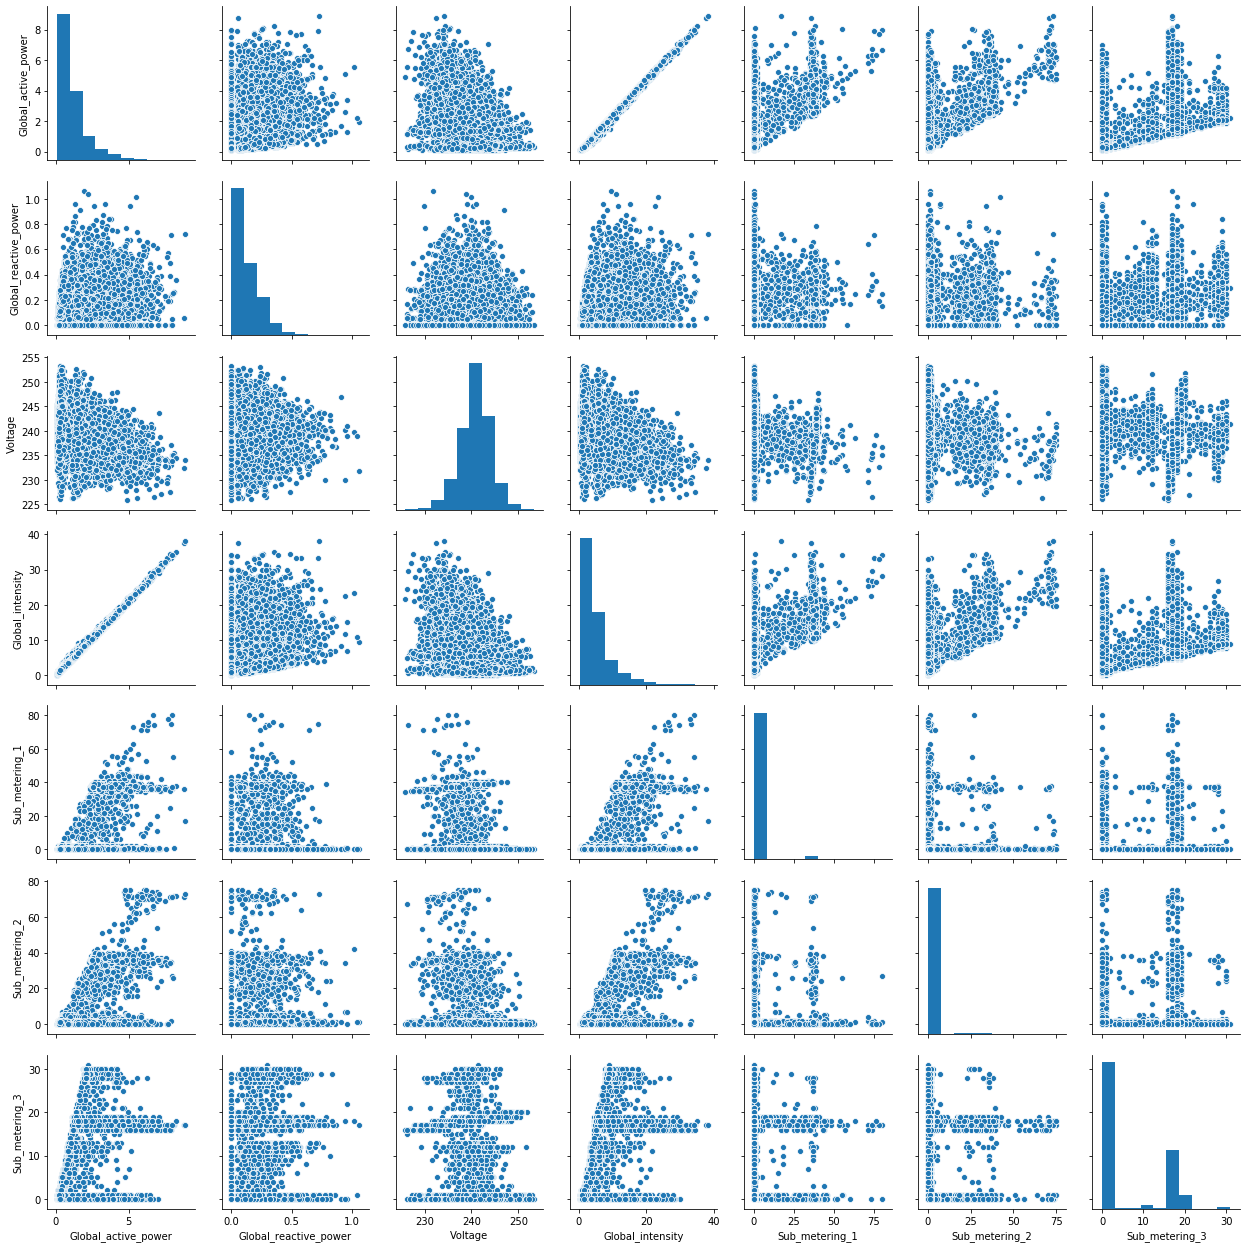

In [19]:
sns.pairplot(data1)

In [20]:
data1.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.246846,-0.404093,0.998902,0.486254,0.438512,0.640330
Global_reactive_power,0.246846,1.000000,-0.113631,0.265912,0.109980,0.153995,0.092242
Voltage,-0.404093,-0.113631,1.000000,-0.415254,-0.198916,-0.170477,-0.277665
Global_intensity,0.998902,0.265912,-0.415254,1.000000,0.491092,0.444767,0.628020
Sub_metering_1,0.486254,0.109980,-0.198916,0.491092,1.000000,0.063336,0.104597
Sub_metering_2,0.438512,0.153995,-0.170477,0.444767,0.063336,1.000000,0.082758
Sub_metering_3,0.640330,0.092242,-0.277665,0.628020,0.104597,0.082758,1.000000


**Global intensity and Global_active_power are correlated with 0.998 we can take anyone of it**

In [21]:
(data1.corr()>0.9).sum()

Global_active_power      2
Global_reactive_power    1
Voltage                  1
Global_intensity         2
Sub_metering_1           1
Sub_metering_2           1
Sub_metering_3           1
dtype: int64

In [22]:
# checking the Null and NA value in our data 

data1.isna().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [23]:
data1.isnull().sum()

Date                     0
Time                     0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [24]:
data2=data1.drop(['Date','Time'], axis=1)


In [25]:
data2['Total_metering']=data2['Sub_metering_1']+data2['Sub_metering_2']+data2['Sub_metering_3']

In [26]:
data2.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Total_metering'],
      dtype='object')

Text(0, 0.5, 'Total_metering')

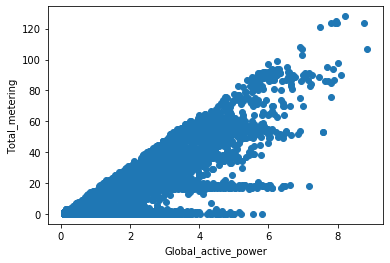

In [27]:
plt.scatter(data2['Global_active_power'],data2['Total_metering'])
plt.xlabel("Global_active_power")
plt.ylabel("Total_metering")


In [28]:
(data2['Global_active_power']==0).sum()

0

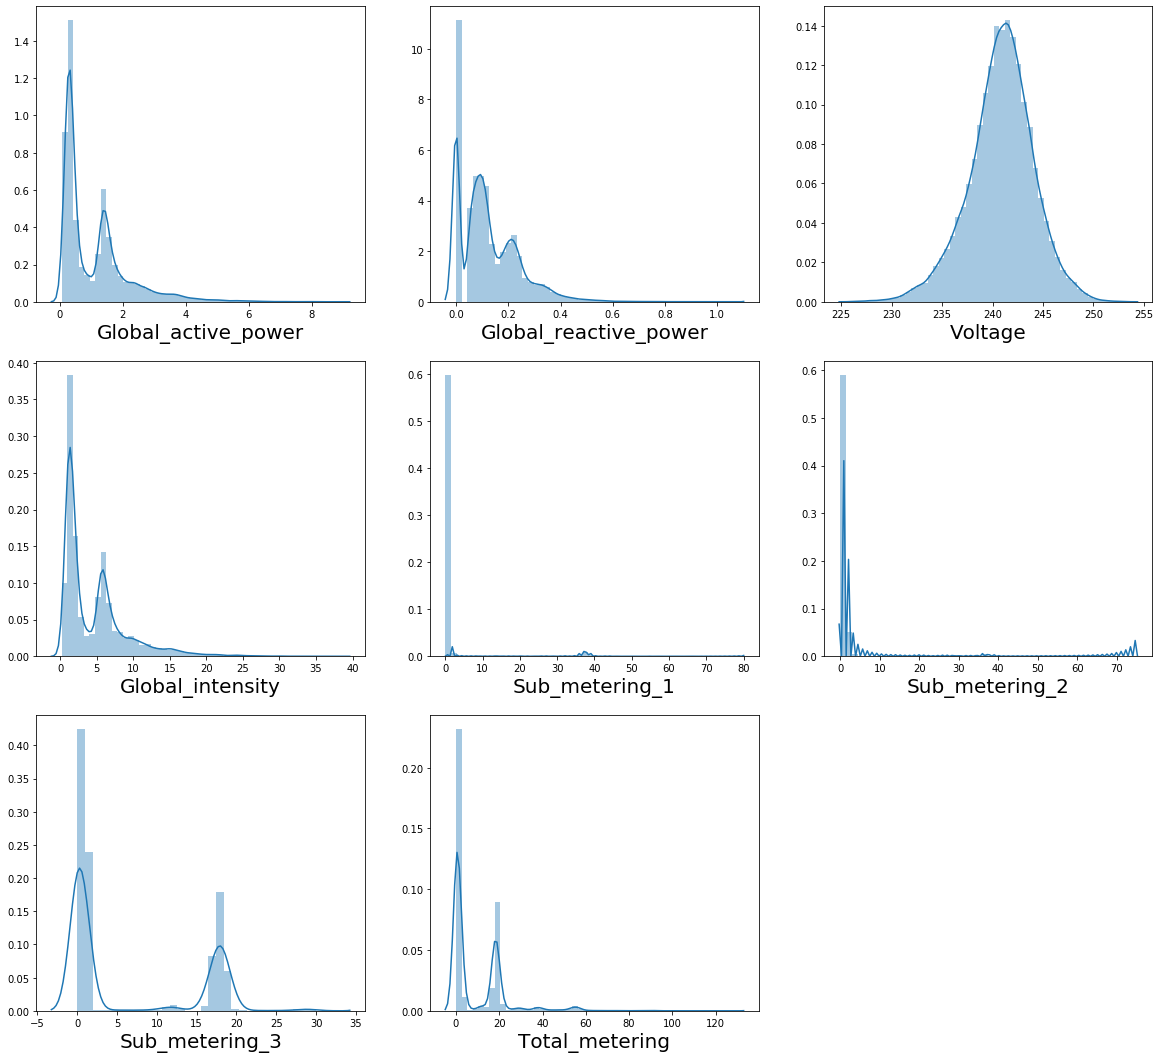

In [29]:
### lets check the distrubtion of the data
plotnumber=1
plt.figure(figsize=(20,25),facecolor='white')
for column in data2:
    if plotnumber<9:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data2[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

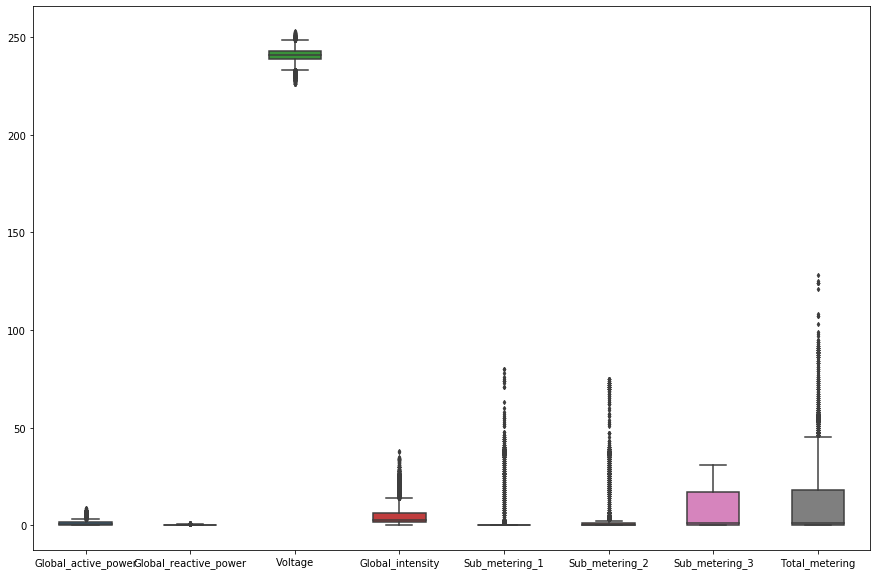

In [30]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data2,width=0.5, ax=ax,fliersize=3)


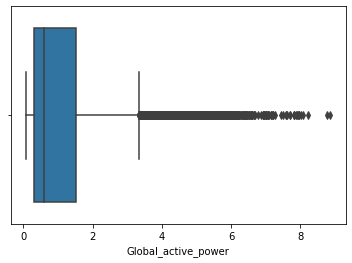

In [31]:
sns.boxplot(data1['Global_active_power'])

In [32]:
data_log_gap=np.log(data1['Global_active_power'])

In [33]:
data_log_gap

2015190   -0.911303
1133345    0.011929
1598244    0.421338
1260386   -0.916291
1861818    0.132781
             ...   
931941    -0.141564
506873    -1.505078
820776    -0.183923
798393    -1.541779
126346    -1.164752
Name: Global_active_power, Length: 39496, dtype: float64

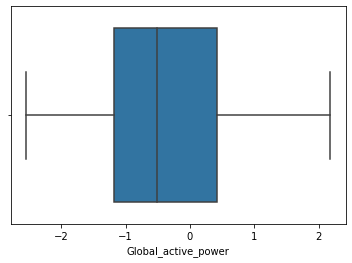

In [34]:
sns.boxplot(data_log_gap)

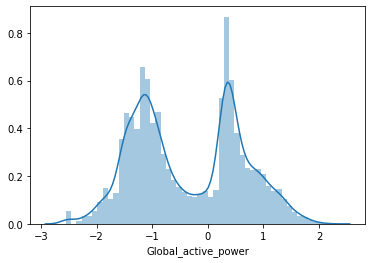

In [35]:
sns.distplot(data_log_gap)

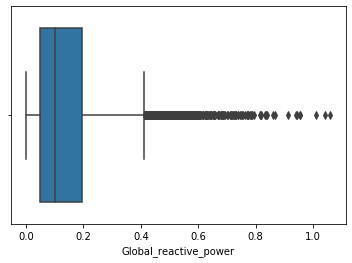

In [36]:
sns.boxplot(data1['Global_reactive_power'])

In [37]:
data1['Global_reactive_power']==0

2015190    False
1133345    False
1598244    False
1260386    False
1861818    False
           ...  
931941     False
506873      True
820776     False
798393     False
126346     False
Name: Global_reactive_power, Length: 39496, dtype: bool

In [38]:
data1.to_excel("output.xlsx")

In [39]:
data1['Date']

2015190    16/10/2010
1133345     10/2/2009
1598244    30/12/2009
1260386      9/5/2009
1861818      1/7/2010
              ...    
931941      23/9/2008
506873      3/12/2007
820776       8/7/2008
798393      23/6/2008
126346      14/3/2007
Name: Date, Length: 39496, dtype: object

In [40]:
data2

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_metering
2015190,0.402,0.206,244.21,1.8,0.0,1.0,0.0,1.0
1133345,1.012,0.078,241.06,4.2,0.0,0.0,0.0,0.0
1598244,1.524,0.240,244.74,6.2,0.0,0.0,19.0,19.0
1260386,0.400,0.124,243.40,1.8,0.0,0.0,0.0,0.0
1861818,1.142,0.348,238.29,5.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
931941,0.868,0.046,239.07,3.6,0.0,0.0,0.0,0.0
506873,0.222,0.000,239.70,1.0,0.0,0.0,0.0,0.0
820776,0.832,0.112,240.16,3.6,0.0,0.0,11.0,11.0
798393,0.214,0.104,240.51,1.0,0.0,1.0,1.0,2.0


In [41]:

q = data2['Global_active_power'].quantile(0.98)

# we are removing the top 2% data from the Global_active_power column

data2_cleaned = data2[data2['Global_active_power']<q]

######################################################################################################################

q = data2_cleaned['Voltage'].quantile(0.99)

# we are removing the top 1% data from the BMI column

data2_cleaned  = data2_cleaned[data2_cleaned['Voltage']<q]



########################################################################################################################

q = data2_cleaned['Global_reactive_power'].quantile(0.99)

# we are removing the top 1% data from the BMI column

data2_cleaned  = data2_cleaned[data2_cleaned['Global_reactive_power']<q]

#######################################################################################################################

q = data2_cleaned['Global_intensity'].quantile(0.99)

# we are removing the top 1% data from the Global_intensity column

data2_cleaned  = data2_cleaned[data2_cleaned['Global_intensity']<q]

########################################################################################################################
q = data2_cleaned['Sub_metering_1'].quantile(0.99)

# we are removing the top 1% data from the Insulin column

data2_cleaned  = data2_cleaned[data2_cleaned['Sub_metering_1']<q]

#########################################################################################################################

q = data2_cleaned['Sub_metering_2'].quantile(0.99)

# we are removing the top 1% data from the Insulin column

data2_cleaned  = data2_cleaned[data2_cleaned['Sub_metering_2']<q]

##########################################################################################################################

q = data2_cleaned['Sub_metering_3'].quantile(0.99)

# we are removing the top 1% data from the Insulin column

data2_cleaned  = data2_cleaned[data2_cleaned['Sub_metering_1']<q]


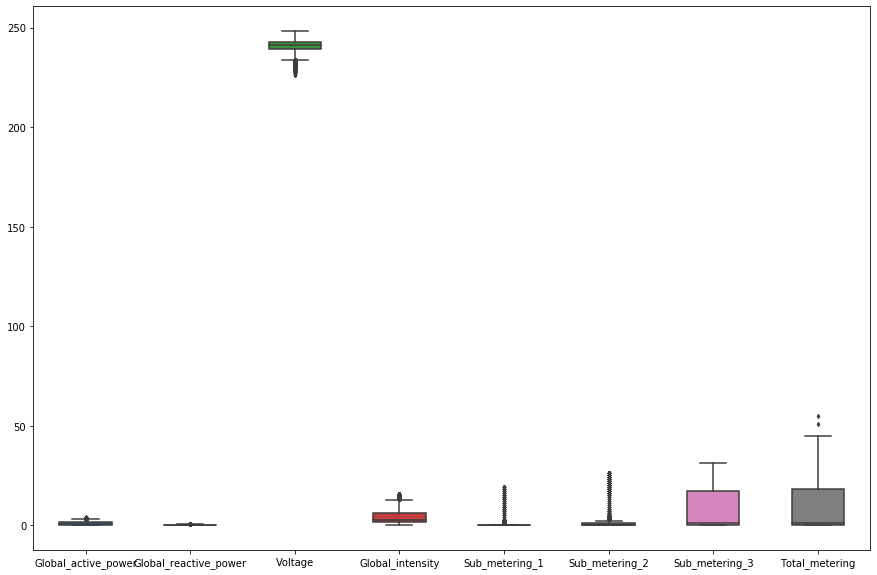

In [42]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data2_cleaned,width=0.5, ax=ax,fliersize=3)

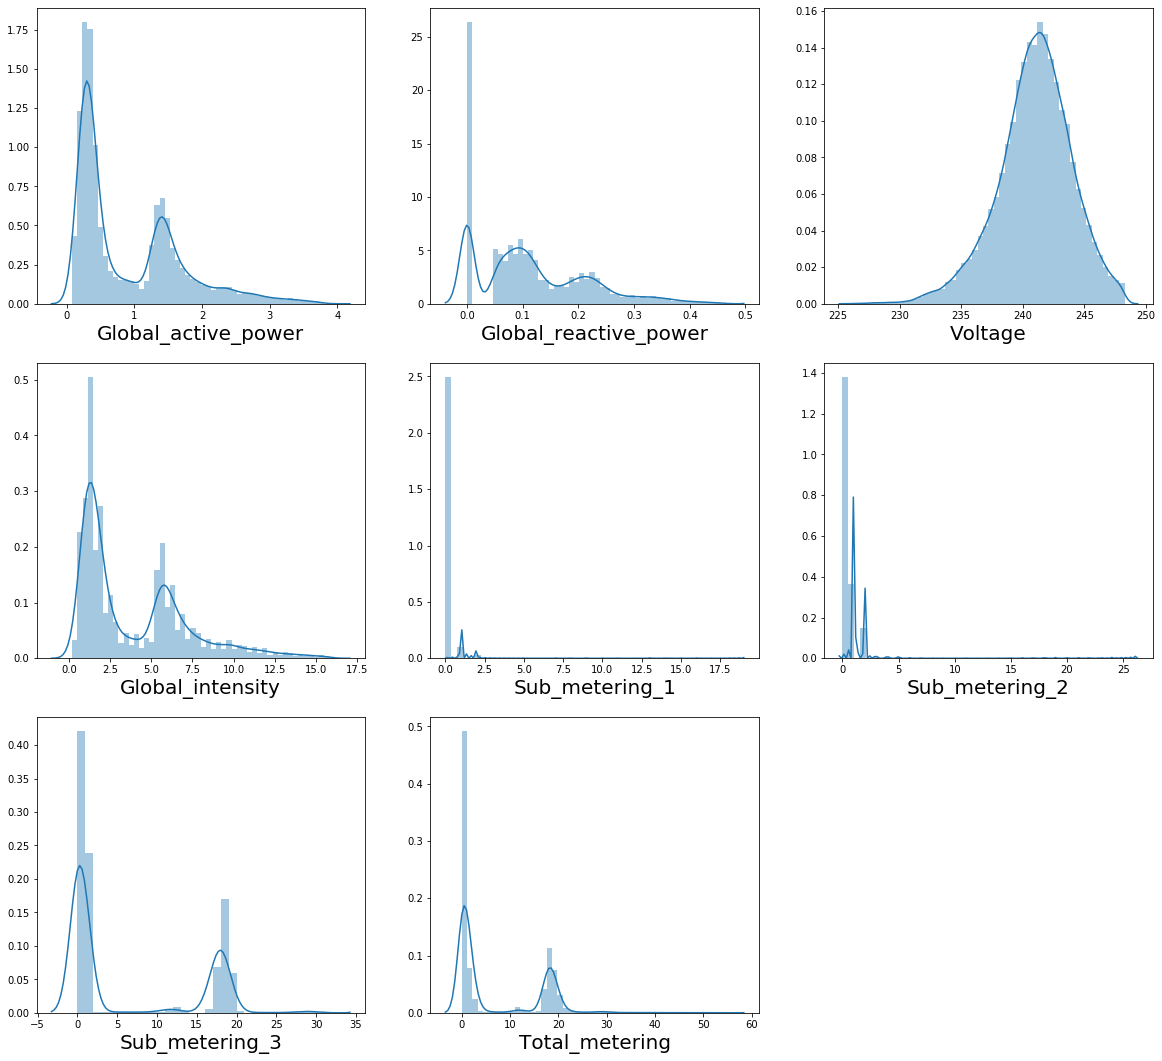

In [43]:
### lets check the distrubtion of the data
plotnumber=1
plt.figure(figsize=(20,25),facecolor='white')
for column in data2_cleaned:
    if plotnumber<9:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(data2_cleaned[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

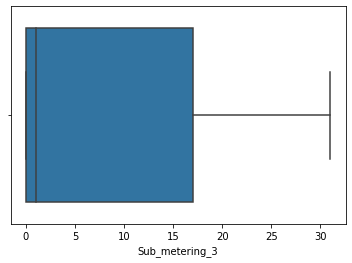

In [44]:
sns.boxplot(data2_cleaned['Sub_metering_3'])

In [45]:
data2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_metering
2015190,0.402,0.206,244.21,1.8,0.0,1.0,0.0,1.0
1133345,1.012,0.078,241.06,4.2,0.0,0.0,0.0,0.0
1598244,1.524,0.240,244.74,6.2,0.0,0.0,19.0,19.0
1260386,0.400,0.124,243.40,1.8,0.0,0.0,0.0,0.0
1861818,1.142,0.348,238.29,5.0,0.0,0.0,1.0,1.0


In [46]:
data2.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_metering
931941,0.868,0.046,239.07,3.6,0.0,0.0,0.0,0.0
506873,0.222,0.000,239.70,1.0,0.0,0.0,0.0,0.0
820776,0.832,0.112,240.16,3.6,0.0,0.0,11.0,11.0
798393,0.214,0.104,240.51,1.0,0.0,1.0,1.0,2.0
126346,0.312,0.114,241.87,1.4,0.0,1.0,0.0,1.0


In [47]:
data2.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_metering
count,39496.000000,39496.000000,39496.000000,39496.000000,39496.000000,39496.000000,39496.000000,39496.000000
mean,1.094252,0.123737,240.832076,4.639614,1.149559,1.311956,6.517344,8.978859
std,1.063042,0.112751,3.233601,4.469918,6.221594,5.805719,8.446695,12.940133
min,0.078000,0.000000,225.900000,0.200000,0.000000,0.000000,0.000000,0.000000
25%,0.308000,0.048000,238.980000,1.400000,0.000000,0.000000,0.000000,0.000000
50%,0.598000,0.100000,241.000000,2.600000,0.000000,0.000000,1.000000,1.000000
75%,1.524000,0.194000,242.880000,6.400000,0.000000,1.000000,17.000000,18.000000
max,8.862000,1.060000,253.260000,38.200000,80.000000,75.000000,31.000000,128.000000


In [48]:
(data2['Global_reactive_power']==0).sum()

9307

In [49]:
(data2['Sub_metering_1']==0).sum()

36236

In [50]:
(data2['Sub_metering_2']==0).sum()

27588

In [51]:
(data2['Sub_metering_3']==0).sum()

16228

In [52]:
(data2['Total_metering']==0).sum()

11316

In [53]:
data.to_pickle(r'C:\Users\rakva\OneDrive - Vestas Wind Systems A S\Desktop\Data Science\dummy.pkl')

In [54]:
unpickled_data = pd.read_pickle(r"C:\Users\rakva\OneDrive - Vestas Wind Systems A S\Desktop\Data Science\dummy.pkl")  

In [55]:
unpickled_data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0,240.43,4,0,0,0.0
2075255,26/11/2010,20:59:00,0.944,0,240,4,0,0,0.0
2075256,26/11/2010,21:00:00,0.938,0,239.82,3.8,0,0,0.0
2075257,26/11/2010,21:01:00,0.934,0,239.7,3.8,0,0,0.0


In [56]:
import pickle
data1.to_pickle('ravi.pkl')

In [57]:
unpickled_data2 = pd.read_pickle("ravi.pkl")

In [58]:
unpickled_data2

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2015190,16/10/2010,03:54:00,0.402,0.206,244.21,1.8,0.0,1.0,0.0
1133345,10/2/2009,18:29:00,1.012,0.078,241.06,4.2,0.0,0.0,0.0
1598244,30/12/2009,14:48:00,1.524,0.240,244.74,6.2,0.0,0.0,19.0
1260386,9/5/2009,23:50:00,0.400,0.124,243.40,1.8,0.0,0.0,0.0
1861818,1/7/2010,15:42:00,1.142,0.348,238.29,5.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
931941,23/9/2008,21:45:00,0.868,0.046,239.07,3.6,0.0,0.0,0.0
506873,3/12/2007,17:17:00,0.222,0.000,239.70,1.0,0.0,0.0,0.0
820776,8/7/2008,17:00:00,0.832,0.112,240.16,3.6,0.0,0.0,11.0
798393,23/6/2008,03:57:00,0.214,0.104,240.51,1.0,0.0,1.0,1.0


In [59]:
type(data2)

pandas.core.frame.DataFrame

In [60]:
type(data1)

pandas.core.frame.DataFrame

In [61]:
type(data)

pandas.core.frame.DataFrame

In [62]:
data2.to_json('ravi')

In [63]:
data2.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Total_metering
2015190,0.402,0.206,244.21,1.8,0.0,1.0,0.0,1.0
1133345,1.012,0.078,241.06,4.2,0.0,0.0,0.0,0.0
1598244,1.524,0.240,244.74,6.2,0.0,0.0,19.0,19.0
1260386,0.400,0.124,243.40,1.8,0.0,0.0,0.0,0.0
1861818,1.142,0.348,238.29,5.0,0.0,0.0,1.0,1.0


### connection to MangoDB

due to some issues i am not able to connect to mongodb

In [64]:
pip install pymongo

Note: you may need to restart the kernel to use updated packages.


In [65]:
import pymongo
from pymongo import MongoClient

In [66]:

client = pymongo.MongoClient("mongodb+srv://ravi:<password>@cluster0.nltzvpu.mongodb.net/?retryWrites=true&w=majority")
db = client.test


In [67]:
pymongo.version

'4.2.0'

In [68]:
db = client.gettingStarted



In [69]:
people = db.people

In [70]:
client.close()

In [71]:
data2.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Total_metering'],
      dtype='object')

In [72]:
# selecting independent  paramenters to calculate total metering based on  

#  independent parameter: Global_active_power, Global_reactive_power,Voltage, Global Intensity  

# dependent : Total_metering

In [73]:
# selecting dependent and independent variables :

X=data2_cleaned.drop(columns=['Global_active_power','Sub_metering_1','Sub_metering_2','Sub_metering_3','Total_metering'])
y=data2_cleaned['Total_metering']

In [74]:
X.columns

Index(['Global_reactive_power', 'Voltage', 'Global_intensity'], dtype='object')

In [75]:
y.shape

(36652,)

In [76]:
X.shape

(36652, 3)

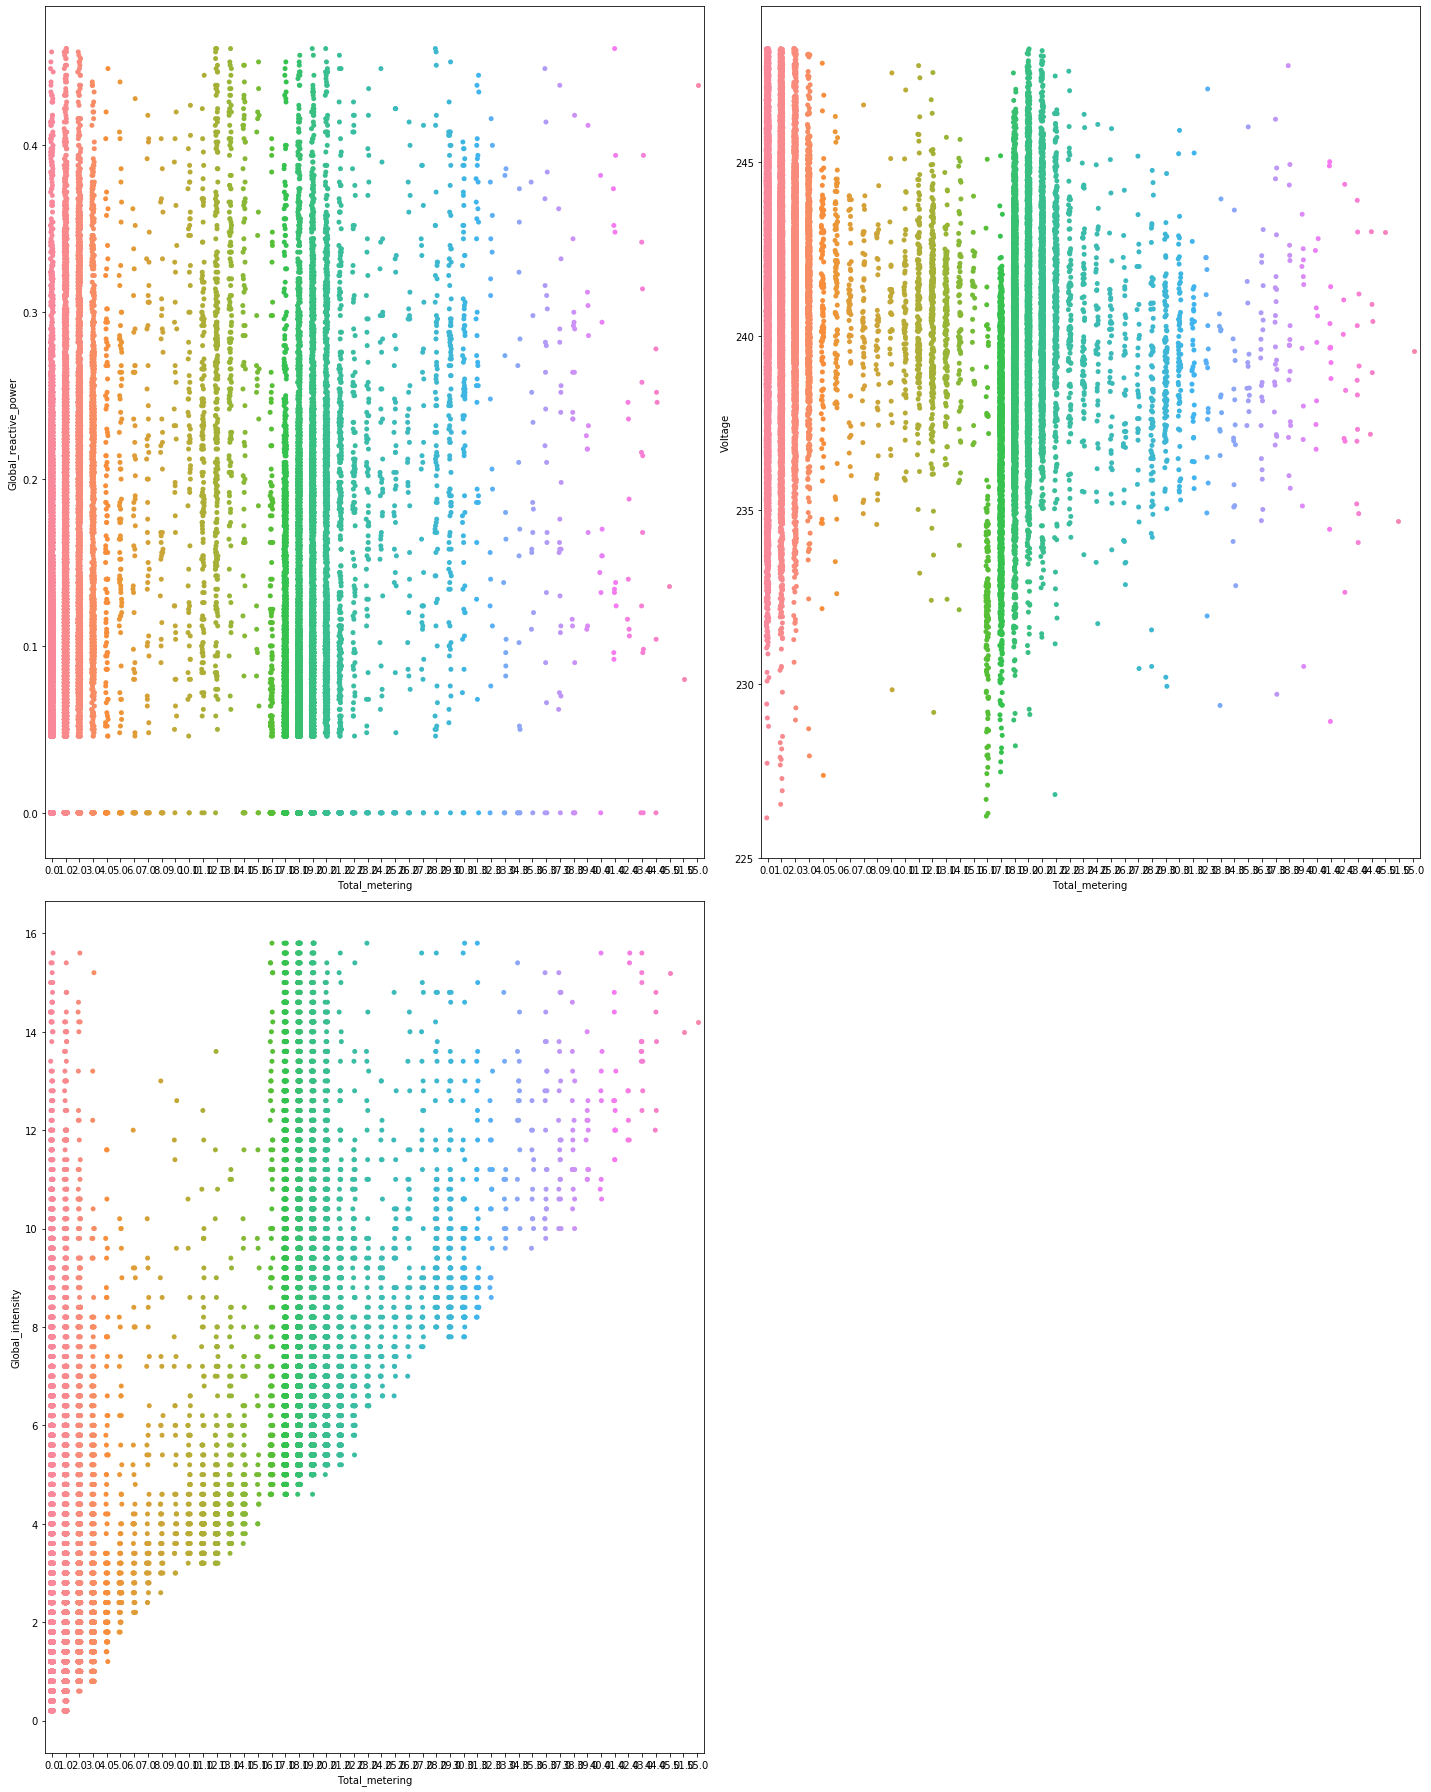

In [77]:
# drawing a stripplot:

# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=6 :
        ax = plt.subplot(2,2,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.tight_layout()

In [78]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [79]:
# Splitting train and test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [80]:
X_train.shape

(24556, 3)

In [81]:
X_test.shape

(12096, 3)

### Linear Regression

In [82]:
X_scaled=scaler.fit_transform(X_train)

In [131]:
X_test_trans=scaler.transform(X_test)

In [132]:
X_test_trans

array([[-0.46230793, -2.01013348, -0.84002014],
       [-0.58203724,  0.05191695, -0.65449459],
       [-0.40244328, -0.61658649, -0.77817829],
       ...,
       [-1.16072888,  1.04968329, -1.02554569],
       [-1.16072888,  0.54414834, -0.59265274],
       [ 1.99214285, -0.97910826, -0.22160164]])

In [83]:
X_scaled

array([[-1.16072888,  2.11396738,  0.14944946],
       [-0.00334559,  1.57849945, -0.77817829],
       [ 0.69507537,  1.06963861,  2.00470495],
       ...,
       [ 1.85245866,  0.41776461,  1.38628645],
       [ 1.57309028,  2.16052981, -0.59265274],
       [-1.16072888,  1.30577665, -0.77817829]])

In [84]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.039810,Global_reactive_power
1,1.119765,Voltage
2,1.158655,Global_intensity


**All the VIF values are less than 5 and are very low. That means no multicollinearity.Now, we can go ahead with fitting our data to the model. Before that, let's split our data in test and training set.**

In [129]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

lin_reg.fit(X_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [133]:
y_pred_lin=lin_reg.predict(X_test_trans)

In [134]:
# printing regression coefficients

print(lin_reg.coef_)
print("\n")
print(lin_reg.intercept_)

[-0.35861026 -0.11638692  6.71182922]


6.873635771298258


### prediction for test data

In [135]:
y_pred_lin.shape

(12096,)

### Assumption of linear ridge Regression

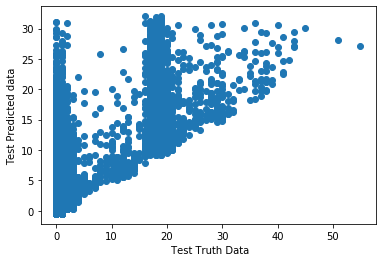

In [136]:
# first Assumption , relation between Y actual and Y predicted 
plt.scatter(y_test,y_pred_lin)
x=plt.xlabel(" Test Truth Data")
y=plt.ylabel("Test Predicted data")

In [137]:
# Residuals:
residuals_lin=y_test-y_pred_lin

In [138]:
residuals_lin

239508    -1.635306
24739     -2.683462
668136    -1.866719
1364662    9.541022
1413885   -0.248569
             ...   
1680396    3.666603
372920     5.085263
1919547    1.715572
902848     0.751231
1725193   -3.785836
Name: Total_metering, Length: 12096, dtype: float64

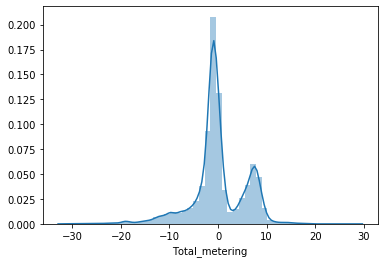

In [139]:
sns.distplot(residuals_lin)

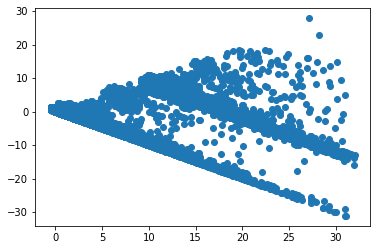

In [140]:
## Scatter plot with Redictions and residuals
## Uniform distribution

plt.scatter(y_pred_lin, residuals_lin)

In [141]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_lin))
print(mean_absolute_error(y_test,y_pred_lin))
print(np.sqrt(mean_squared_error(y_test, y_pred_lin)))

30.910822272516544
3.8669183458828758
5.559750198751428


In [142]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_lin)
print(score)

0.597182741486121


In [96]:
## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.597082803363764

### Lasso Regressions

In [97]:
# importing Lasso Regression
from sklearn.linear_model import Lasso
lasso=Lasso()

### model training in Lasso

In [143]:
lasso.fit(X_scaled,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [144]:
print(lasso.coef_)
print(lasso.intercept_)

[-0.         -0.          5.67975125]
6.873635771298257


In [146]:
y_pred_lasso=lasso.predict(X_test_trans)

In [147]:
y_pred_lasso

array([2.10253035, 3.15626932, 2.45377667, ..., 1.04879138, 3.50751564,
       5.61499358])

### Assumptions of Lasso Linear Regressions

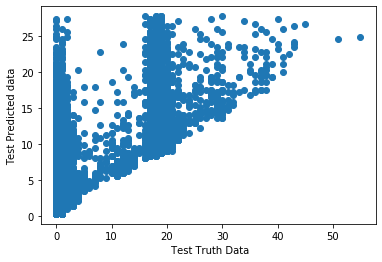

In [148]:
# first Assumption , relation between Y actual and Y predicted 
plt.scatter(y_test,y_pred_lasso)
x=plt.xlabel(" Test Truth Data")
y=plt.ylabel("Test Predicted data")

In [149]:
lasso_residue=y_test-y_pred_lasso

In [150]:
lasso_residue

239508     -2.102530
24739      -3.156269
668136     -2.453777
1364662    10.223790
1413885    -1.102530
             ...    
1680396     4.955095
372920      5.765065
1919547     0.951209
902848      0.492484
1725193    -4.614994
Name: Total_metering, Length: 12096, dtype: float64

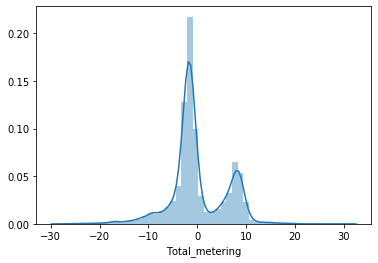

In [151]:
sns.distplot(lasso_residue)

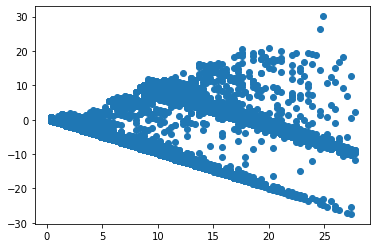

In [152]:
## Scatter plot with Redictions and residuals
## Uniform distribution

plt.scatter(y_pred_lasso, lasso_residue)

In [153]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_lasso))
print(mean_absolute_error(y_test,y_pred_lasso))
print(np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

32.06911539396157
4.245296615051159
5.662959949881472


In [154]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_lasso)
print(score)

## Adjusted R square error
print('\n')
print('Adjusted R-Sqare=')
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5820883368267272


Adjusted R-Sqare=


0.5819846538140312

In [155]:
## Adjusted R square error

1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5819846538140312

### Ridge Regression 

In [110]:
# importing Lasso Regression
from sklearn.linear_model import Ridge
ridge=Ridge()

In [156]:
ridge.fit(X_scaled,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [157]:
print(lasso.coef_)
print(lasso.intercept_)

[-0.         -0.          5.67975125]
6.873635771298257


In [158]:
y_pred_ridge=ridge.predict(X_test_trans)

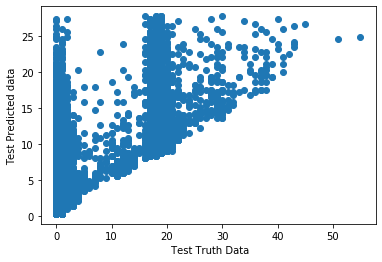

In [159]:
# first Assumption , relation between Y actual and Y predicted 
plt.scatter(y_test,y_pred_lasso)
x=plt.xlabel(" Test Truth Data")
y=plt.ylabel("Test Predicted data")

In [160]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_squared_error(y_test,y_pred_ridge))
print(mean_absolute_error(y_test,y_pred_ridge))
print(np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

30.91083376950437
3.8669860505159352
5.559751232699568


In [161]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred_ridge)
print(score)

## Adjusted R square error
print('\n')
print('Adjusted R-Sqare=')
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5971825916620537


Adjusted R-Sqare=


0.5970826535025255

### Support  vector Regression

In [162]:
X_train

,Global_reactive_power,Voltage,Global_intensity
2038187,0.000,247.32,4.4
2033924,0.116,245.71,1.4
1610146,0.186,244.18,10.4
397870,0.000,242.57,0.6
112610,0.000,238.06,4.0
...,...,...,...
595914,0.000,241.35,6.4
1902954,0.000,240.25,0.6
737617,0.302,242.22,8.4
1277765,0.274,247.46,2.0


In [170]:
### RBF Kernel

from sklearn.svm import SVR

from sklearn.metrics import r2_score

regressor_svr = SVR(kernel = 'rbf')
regressor_svr.fit(X_scaled, y_train)
y_pred_svr_rbf=regressor_svr.predict(X_test_trans)

score=r2_score(y_test,y_pred_svr_rbf)
print(score)

## Adjusted R square error
print('\n')
print('Adjusted R-Sqare=')
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)


0.6819796651889825


Adjusted R-Sqare=


0.6819007650066773

In [163]:
X_scaled

array([[-1.16072888,  2.11396738,  0.14944946],
       [-0.00334559,  1.57849945, -0.77817829],
       [ 0.69507537,  1.06963861,  2.00470495],
       ...,
       [ 1.85245866,  0.41776461,  1.38628645],
       [ 1.57309028,  2.16052981, -0.59265274],
       [-1.16072888,  1.30577665, -0.77817829]])

In [121]:
print(lasso.coef_)
print(lasso.intercept_)

[-0.        -0.         1.9698305]
-0.8415443955652151


In [122]:
y_pred_svr=regressor_svr.predict(X_test)

In [124]:
y_test

239508      0.0
24739       0.0
668136      0.0
1364662    19.0
1413885     1.0
           ... 
1680396    19.0
372920     17.0
1919547     2.0
902848      4.0
1725193     1.0
Name: Total_metering, Length: 12096, dtype: float64

In [125]:
y_pred_svr

array([0.09339448, 0.55772893, 0.49196157, ..., 0.1339446 , 0.16215365,
       1.04279906])

In [164]:
# polynomial Kernell


from sklearn.svm import SVR

from sklearn.metrics import r2_score

regressor_svr_poly = SVR(kernel = 'poly')
regressor_svr_poly.fit(X_scaled, y_train)
y_pred_svr_poly=regressor_svr_poly.predict(X_test_trans)

score=r2_score(y_test,y_pred_svr_poly)
print(score)

## Adjusted R square error
print('\n')
print('Adjusted R-Sqare=')
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.15154934308909773


Adjusted R-Sqare=


0.15133884424930832

In [168]:
# polynomial Kernell


from sklearn.svm import SVR

from sklearn.metrics import r2_score

regressor_svr_sig = SVR(kernel = 'sigmoid')
regressor_svr_sig.fit(X_scaled, y_train)

y_pred_svr_sig=regressor_svr_sig.predict(X_test_trans)

score=r2_score(y_test, y_pred_svr_sig)
print(score)

## Adjusted R square error
print('\n')
print('Adjusted R-Sqare=')
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

-3450.5472393930163


Adjusted R-Sqare=


-3451.4035610700075